In [3]:
'''

Ref
 https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Recommender%20Systems%20-%20The%20Fundamentals.ipynb

 https://towardsdatascience.com/how-did-we-build-book-recommender-systems-in-an-hour-the-fundamentals-dfee054f978e


 https://medium.com/data-from-the-trenches/deep-beers-playing-with-deep-recommendation-engines-using-keras-part-1-1efc4779568f

 https://towardsdatascience.com/creating-a-movie-recommender-using-convolutional-neural-networks-be93e66464a7

'''

'\n https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Recommender%20Systems%20-%20The%20Fundamentals.ipynb\n\n https://towardsdatascience.com/how-did-we-build-book-recommender-systems-in-an-hour-the-fundamentals-dfee054f978e\n\n\n https://medium.com/data-from-the-trenches/deep-beers-playing-with-deep-recommendation-engines-using-keras-part-1-1efc4779568f\n\n https://towardsdatascience.com/creating-a-movie-recommender-using-convolutional-neural-networks-be93e66464a7\n\n'

### loading dependicies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### loading the data

In [5]:
books = pd.read_csv('bx-book/BX-Books.csv', sep=';', error_bad_lines=False, encoding='latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/home/ivan/Environments/RS/lib/python3.5/site-packages/IPython/core/intera

In [6]:
books.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

In [8]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
users = pd.read_csv('bx-book/BX-Users.csv', sep=';', error_bad_lines=False, encoding='latin-1')

In [10]:
users.columns = ['userID', 'Location', 'Age']

In [11]:
ratings = pd.read_csv('bx-book/BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

### ratings the data

In [12]:
ratings.shape, list(ratings.columns)

((1149780, 3), ['userID', 'ISBN', 'bookRating'])

In [13]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### ratings distribution

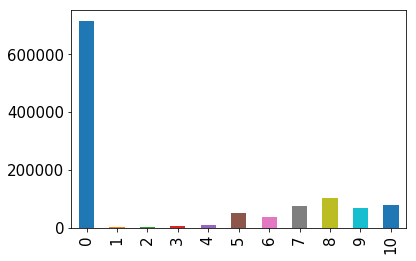

In [14]:
plt.rc('font', size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

### books dataset

In [15]:
books.shape, books.columns

((271360, 8),
 Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
        'imageUrlS', 'imageUrlM', 'imageUrlL'],
       dtype='object'))

In [16]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### users dataset

In [17]:
users.shape, users.columns

((278858, 3), Index(['userID', 'Location', 'Age'], dtype='object'))

In [18]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### age distribution

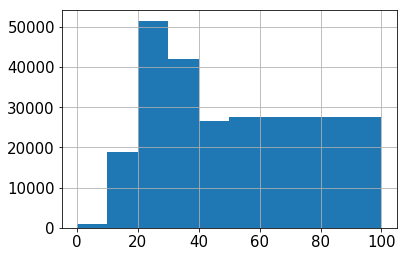

In [19]:
users.Age.hist(bins=[0,10,20,30,40,50,100])
plt.savefig('system2.png', bbox_inches='tight')
plt.show()

## Recommendations based on ratings counts

In [20]:
rating_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())

In [21]:
rating_count.head()

,bookRating
ISBN,
0330299891,2
0375404120,2
0586045007,1
9022906116,2
9032803328,1


In [23]:
rating_count.sort_values('bookRating', ascending=False).head()

,bookRating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


### figuring out which titles received most ratings

In [24]:
most_rated_books = pd.DataFrame(['0971880107', '0316666343', '0385504209', '0060928336', '0312195516'],
                               index=np.arange(5), columns=['ISBN'])

In [25]:
most_rated_books.head()

,ISBN
0,0971880107
1,0316666343
2,0385504209
3,0060928336
4,0312195516


In [26]:
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')

In [27]:
most_rated_books_summary.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


## recommendations based on correlations

In [28]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())

In [29]:
average_rating.head()

,bookRating
ISBN,
0330299891,3.0
0375404120,1.5
0586045007,0.0
9022906116,3.5
9032803328,0.0


In [30]:
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())

In [31]:
average_rating.head()

,bookRating,ratingCount
ISBN,,
0330299891,3.0,2
0375404120,1.5,2
0586045007,0.0,1
9022906116,3.5,2
9032803328,0.0,1


In [32]:
average_rating.sort_values('ratingCount', ascending=False).head()

,bookRating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


In [33]:
# In this dataet, the book that received the most ratings is not highly rated at all. 
# So if we were set to use recommendations based on rating counts, we would definitely make mistaks here.

In [34]:
# To ensure statistical significance, users with less than 200 ratings, 
# and books with less than 100 ratings are excluded.

In [35]:
counts1 = ratings['userID'].value_counts()

In [37]:
counts1.head()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
Name: userID, dtype: int64

In [36]:
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]

In [38]:
ratings.head()

,userID,ISBN,bookRating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [39]:
counts = ratings['bookRating'].value_counts()

In [40]:
counts.head()

0     393853
8      31574
10     28396
9      23547
7      21124
Name: bookRating, dtype: int64

In [41]:
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

In [42]:
ratings.head()

,userID,ISBN,bookRating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


### rating matrix

In [43]:
ratings_pivot = ratings.pivot(index='userID', columns='ISBN').bookRating

In [44]:
type(ratings_pivot)

pandas.core.frame.DataFrame

In [45]:
ratings_pivot.head()

ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
userID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
ratings_pivot.index

Int64Index([   254,   2276,   2766,   2977,   3363,   3757,   4017,   4385,
              6242,   6251,
            ...
            274004, 274061, 274301, 274308, 274808, 275970, 277427, 277478,
            277639, 278418],
           dtype='int64', name='userID', length=905)

In [47]:
userID = ratings_pivot.index

In [48]:
ISBN = ratings_pivot.columns

In [49]:
ISBN

Index([' 0330299891', ' 0375404120', ' 0586045007', ' 9022906116',
       ' 9032803328', ' 9044922564', ' 9044922572', ' 9044922718',
       ' 9044923161', ' 904492401X',
       ...
       'UNGRANDHOMMED', 'X000000000', 'YOUTELLEM,AND', 'ZR903CX0003',
       '\0432534220\""', '\2842053052\""', 'b00005wz75', 'cn108465',
       'cn113107', 'Ô½crosoft'],
      dtype='object', name='ISBN', length=207699)

In [50]:
ratings_pivot.shape

(905, 207699)

In [51]:
# Let's find out which books are correlated with the 2nd most rated book "The Lovely Bones: A Novel". 

In [52]:
bones_rating = ratings_pivot['0316666343']

In [54]:
bones_rating.head()

userID
254     NaN
2276    NaN
2766    9.0
2977    NaN
3363    0.0
Name: 0316666343, dtype: float64

In [55]:
bones_rating.shape

(905,)

In [56]:
similar_to_bones = ratings_pivot.corrwith(bones_rating)

/home/ivan/Environments/RS/lib/python3.5/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/ivan/Environments/RS/lib/python3.5/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [58]:
similar_to_bones.head()

ISBN
 0330299891   NaN
 0375404120   NaN
 0586045007   NaN
 9022906116   NaN
 9032803328   NaN
dtype: float64

In [59]:
similar_to_bones.shape

(207699,)

In [60]:
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])

In [61]:
corr_bones.dropna(inplace=True)

In [62]:
corr_summary = corr_bones.join(average_rating['ratingCount'])

In [63]:
corr_summary[corr_summary['ratingCount']>=300].sort_values('pearsonR', ascending=False).head(10)

,pearsonR,ratingCount
ISBN,,
0316666343,1.000000,1295
0312291639,0.471872,354
0316601950,0.434248,568
0446610038,0.429712,391
0446672211,0.421478,585
0385265700,0.351635,319
0345342968,0.316922,321
0060930535,0.309860,494
0375707972,0.308145,354


In [64]:
# We obtained the books' ISBNs, but we need to find out the names of the books to see whether they make sense.

In [65]:
books_corr_to_bones = pd.DataFrame(['0312291639', '0316601950', '0446610038', '0446672211', 
                                    '0385265700', '0345342968', '0060930535', '0375707972', '0684872153'],
                                  index=np.arange(9), columns=['ISBN'])

In [66]:
corr_books = pd.merge(books_corr_to_bones, books, on='ISBN')

In [67]:
corr_books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0312291639,The Nanny Diaries: A Novel,Emma McLaughlin,2003,St. Martin's Griffin,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...,http://images.amazon.com/images/P/0312291639.0...
1,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999,Back Bay Books,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...,http://images.amazon.com/images/P/0316601950.0...
2,0446610038,1st to Die: A Novel,James Patterson,2002,Warner Vision,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...,http://images.amazon.com/images/P/0446610038.0...
3,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...,http://images.amazon.com/images/P/0446672211.0...
4,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990,Anchor,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...,http://images.amazon.com/images/P/0385265700.0...
5,0345342968,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...,http://images.amazon.com/images/P/0345342968.0...
6,0060930535,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
7,0375707972,The Reader,Bernhard Schlink,1999,Vintage Books USA,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...,http://images.amazon.com/images/P/0375707972.0...
8,0684872153,Angela's Ashes (MMP) : A Memoir,Frank McCourt,1999,Scribner,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...,http://images.amazon.com/images/P/0684872153.0...
